In [1]:
# Computes Atlantic basin - not yet converted to working code!!!!
%load_ext autoreload
%autoreload 2

import jCMIP as jc
import matplotlib.pyplot as plt
import copy
from netCDF4 import Dataset
import numpy as np
import sys
import shutil

#print(sys.getrecursionlimit())
#sys.setrecursionlimit(16000)
#sys.setrecursionlimit(20000)

In [2]:
# Finds all points in a closed region (non-recursive):
def make_mask(A,sty,stx):
    ni = np.size(A,axis=1)
    nj = np.size(A,axis=0)
    #print(ni*nj)
    
    if A[sty,stx] == 0:
        print('invalid starting point')
    else:
        plist = np.asarray([[sty,stx],])
        
        cc = 0
        
        while ((np.size(plist) !=0)):
            cc = cc + 1
            #print(np.shape(plist))

            sty = plist[0,0]
            stx = plist[0,1]
            
            if A[sty,stx] == 1:
                # Find all the connected points:
                
                # left
                ptx = stx - 1
                pty = sty
                if ptx == -1:
                    ptx = ni-1
                if A[pty,ptx] == 1:
                    plist = np.concatenate((plist,[[pty,ptx],]),0)
                
                # up
                ptx = stx
                pty = sty + 1
                if pty < nj:   
                    if A[pty,ptx] == 1:
                        plist = np.concatenate((plist,[[pty,ptx],]),0)

                # right 
                ptx = stx + 1
                pty = sty
                if ptx == ni:
                    ptx = 0
                if A[pty,ptx] == 1:  
                    plist = np.concatenate((plist,[[pty,ptx],]),0)

                # down
                ptx = stx
                pty = sty - 1
                if pty >= 0:
                    if A[pty,ptx] == 1:
                        plist = np.concatenate((plist,[[pty,ptx],]),0)
                
            A[sty,stx] = 2
            plist = np.delete(plist,0,0)
            
    print(cc)

In [18]:
cmip   = '5'
#cmip   = '6'
Clist = jc.readList(('../CMIP' + cmip + 'list'))
Models = list(Clist.keys())

Model = Clist[Models[59]]
#Model = Clist['ACCESS-CM2']
print(Model.name)
print(Model.Omeshmask)
for nn in Model.notes:
    print(nn)

inmcm4
unknown
21/10/14 - ocean not on z-levels


In [19]:
# Make basin masks:

infile  = Model.Omeshmask
outfile = ('/gws/pw/j05/wishbone/jmecki/CMIP' + str(cmip) + '/basins/' + Model.name + '_basin_atl.nc')
#outfile = ('/home/users/jmecking001/masks_tmp/CMIP' + str(cmip) + '/' + Model.name + '_basin_atl.nc')

ncid  = Dataset(infile,'r')
tmask = ncid.variables['tmask'][0,0,:,:]
lon   = ncid.variables['tlon'][:,:]
lat   = ncid.variables['tlat'][:,:]
ncid.close()

lon[np.where(lon > 180)]  = lon[np.where(lon > 180)]  - 360
lon[np.where(lon < -180)] = lon[np.where(lon < -180)] + 360

atl_mask = copy.deepcopy(tmask)
# Southern Ocean:
atl_mask[np.where((lat < -30) & ((lon > 20) | (lon < -71)))] = 0
# Arctic:
atl_mask[np.where((lat > 67) & ((lon > 105) | (lon < -90)))] = 0
# Remove Black Sea:
atl_mask[np.where(((lat > 41) & (lat < 45)) & ((lon > 22) & (lon < 45)))] = 0

plt.figure(figsize=(15,12))
plt.pcolormesh(tmask+atl_mask)
plt.colorbar()

print(Model.name)

FileNotFoundError: [Errno 2] No such file or directory: b'unknown'

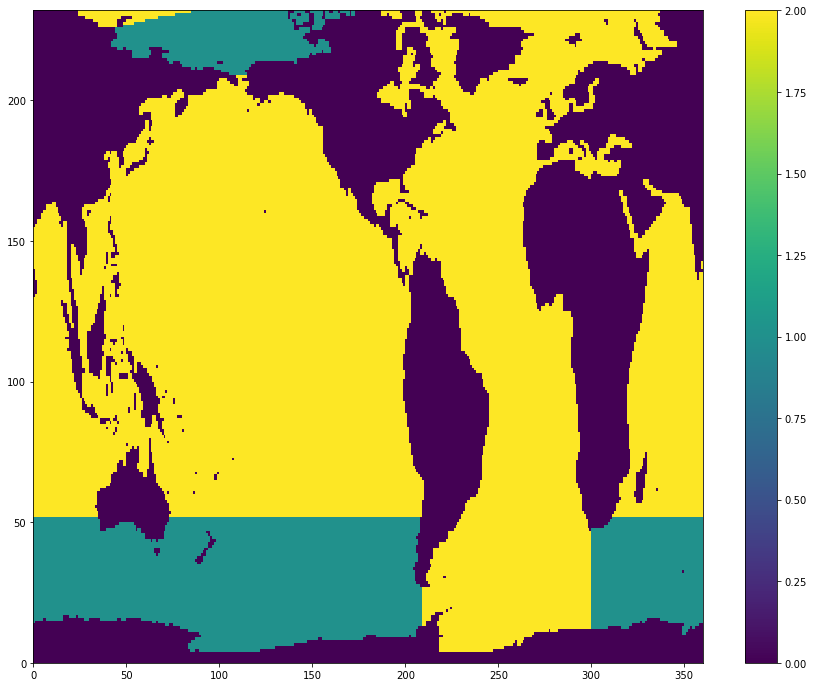

In [12]:
### Fix Arctic if split:

if ((Model.name == 'ACCESS-CM2')        | (Model.name == 'ACCESS-ESM1-5') | (Model.name == 'ACCESS-OM2')    |
    (Model.name == 'CMCC-CM2-SR5')      | (Model.name == 'CMCC-ESM2')     | (Model.name == 'CNRM-CM6-1')    | 
    (Model.name == 'CNRM-ESM2-1')       | (Model.name == 'CanESM5')       | (Model.name == 'EC-Earth3')     | 
    (Model.name == 'EC-Earth3-AerChem') | (Model.name == 'EC-Earth3-CC')  | (Model.name == 'EC-Earth3-Veg') | 
    (Model.name == 'EC-Earth3-Veg-LR')  | (Model.name == 'EC-Earth3P')    | (Model.name == 'ECMWF-IFS-LR')  | 
    (Model.name == 'HadGEM3-GC31-LL')   | (Model.name == 'IPSL-CM6A-LR')  | (Model.name == 'IPSL-CM6A-LR-INCA') |
    (Model.name == 'NESM3')             | (Model.name == 'UKESM1-0-LL')   |
    (Model.name == 'ACCESS1-0')         | (Model.name == 'ACCESS1-3')     | (Model.name == 'CNRM-CM5')      | 
    (Model.name == 'CNRM-CM5-2')        | (Model.name == 'EC-EARTH')):
    atl_mask[260:,200:300] = tmask[260:,200:300]
elif ((Model.name == 'ACCESS-OM2-025') | (Model.name == 'CMCC-CM2-HR4')    | (Model.name == 'CMCC-CM2-VHR4') |
      (Model.name == 'CNRM-CM6-1-HR')  | (Model.name == 'EC-Earth3P-HR')   | (Model.name == 'ECMWF-IFS-HR')  | 
      (Model.name == 'ECMWF-IFS-MR')   | (Model.name == 'HadGEM3-GC31-HM') | (Model.name == 'HadGEM3-GC31-MM')):
    atl_mask[900:,750:1200] = tmask[900:,750:1200]
elif ((Model.name == 'BCC-CSM2-HR')):
    atl_mask[600:,1050:] = tmask[600:,1050:]
elif ((Model.name == 'BCC-CSM2-MR') | (Model.name == 'BCC-ESM1')):
    atl_mask[200:,265:] = tmask[200:,265:]
elif ((Model.name == 'CAMS-CSM1-0') | (Model.name == 'GFDL-ESM2M') | (Model.name == 'IITM-ESM') | 
      (Model.name == 'GFDL-ESM2G')):
    atl_mask[175:,180:] = tmask[175:,180:]
elif ((Model.name == 'FGOALS-f3-L') | (Model.name == 'FGOALS-g3')):
    atl_mask[200:,:150] = tmask[200:,:150]
elif ((Model.name == 'GFDL-CM4')):
    atl_mask[750:,750:] = tmask[750:,750:]
elif ((Model.name == 'HadGEM3-GC31-HH') | (Model.name == 'HadGEM3-GC31-MH')):
    atl_mask[3150:,2200:] = tmask[3150:,2200:]
elif ((Model.name == 'IPSL-CM5A2-INCA')):
    atl_mask[135:,100:] = tmask[135:,100:]
elif ((Model.name == 'MIROC-ES2L') | (Model.name == 'MIROC6')):
    atl_mask[200:,190:] = tmask[200:,190:]
elif ((Model.name == 'MPI-ESM1-2-HR') | (Model.name == 'MPI-ESM1-2-XR') | (Model.name == 'MPI-ESM-MR')):
    atl_mask[380:,450:] = tmask[380:,450:]
elif ((Model.name == 'MRI-ESM2-0')):
    atl_mask[175:,180:] = tmask[175:,180:]
    atl_mask[197,195:210] = 0
    atl_mask[198:203,196] = 0
elif ((Model.name == 'NorESM2-LM') | (Model.name == 'NorESM2-MM')):
    atl_mask[335:,:125] = tmask[335:,:125]
elif ((Model.name == 'CFSv2-2011')):
    # Arctic:
    atl_mask[np.where((lat > 65) & ((lon > 105) | (lon < -90)))] = 0
    # Remove Black Sea:
    atl_mask[np.where(((lat > 40) & (lat < 47)) & ((lon > 26) & (lon < 45)))] = 0
elif ((Model.name == 'CMCC-CESM')    | (Model.name == 'CMCC-CM')      | (Model.name == 'CMCC-CMS') | 
      (Model.name == 'IPSL-CM5A-LR') | (Model.name == 'IPSL-CM5A-MR') | (Model.name == 'IPSL-CM5B-LR')):
    atl_mask[140:,100:] = tmask[140:,100:]
elif ((Model.name == 'GEOS-5')):
    # Arctic:
    atl_mask[np.where((lat > 65) & ((lon > 105) | (lon < -90)))] = 0
    # Remove Black Sea:
    atl_mask[np.where(((lat > 40) & (lat < 47)) & ((lon > 26) & (lon < 45)))] = 0
    atl_mask[99,270:298] = 0
elif ((Model.name == 'GFDL-CM2p1') | (Model.name == 'GFDL-CM3')):
    atl_mask[175:,180:] = tmask[175:,180:]
elif ((Model.name == 'GISS-E2-H') | (Model.name == 'GISS-E2-H-CC')):
    atl_mask[99,270:290] = 0
elif ((Model.name == 'MRI-CGCM3') | (Model.name == 'MRI-ESM1')):
    atl_mask[175:,180:] = tmask[175:,180:]
    atl_mask[175,185:210] = 0
    atl_mask[176:183,195] = 0
elif ((Model.name == 'bcc-csm1-1') | (Model.name == 'bcc-csm1-1-m')):
    atl_mask[175:,180:] = tmask[175:,180:]
    
    

plt.figure(figsize=(15,12))
plt.pcolormesh(tmask+atl_mask)
plt.colorbar()

In [13]:
###### North Half:
atl_maskN = copy.deepcopy(atl_mask)
atl_maskN[np.where(lat <= 0)] = 0 
# Find point in middle of Atlantic:
#inds = np.unravel_index(np.argmin(np.abs(lat-50)*np.abs(lon+40)),np.shape(lon))
inds = np.unravel_index(np.argmin(np.abs(lat-50)+np.abs(lon+40)),np.shape(lon))
styN = inds[0]
stxN = inds[1]

make_mask(atl_maskN,styN,stxN)
atl_maskN[np.where(atl_maskN != 2)] = 0
atl_maskN = atl_maskN/2

# South Half:
atl_maskS = copy.deepcopy(atl_mask)
atl_maskS[np.where(lat > 0)] = 0 
# Find point in middle of Atlantic:
#inds = np.unravel_index(np.argmin(np.abs(lat+20)*np.abs(lon+20)),np.shape(lon))
inds = np.unravel_index(np.argmin(np.abs(lat+20)+np.abs(lon+20)),np.shape(lon))
styS = inds[0]
stxS = inds[1]

make_mask(atl_maskS,styS,stxS)
atl_maskS[np.where(atl_maskS != 2)] = 0
atl_maskS = atl_maskS/2

atl_mask = atl_maskN + atl_maskS

16667
13506


bcc-csm1-1-m


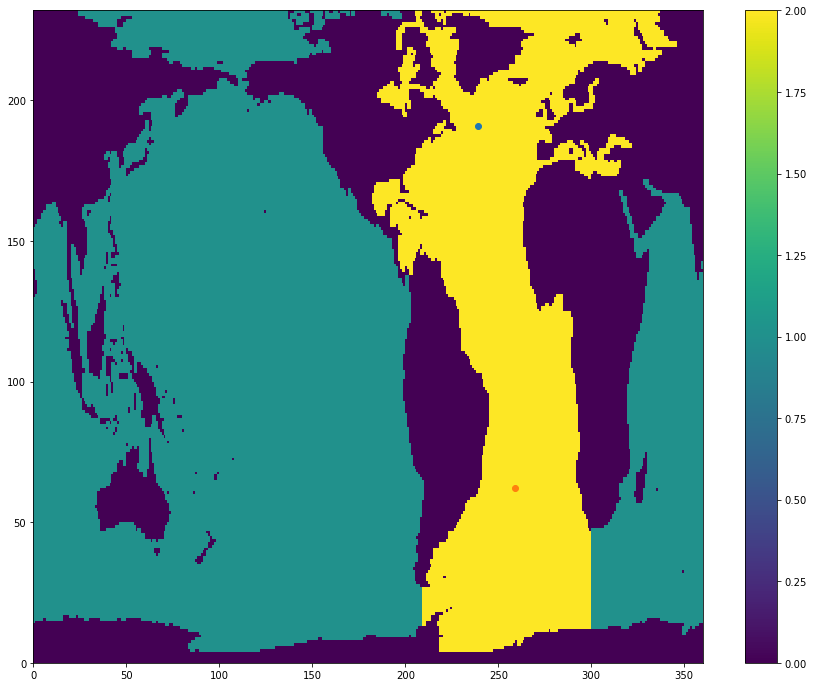

In [14]:
plt.figure(figsize=(15,12))
plt.pcolormesh(tmask+atl_mask)
plt.colorbar()
plt.plot(stxN,styN,marker='o')
plt.plot(stxS,styS,marker='o')

print(Model.name)

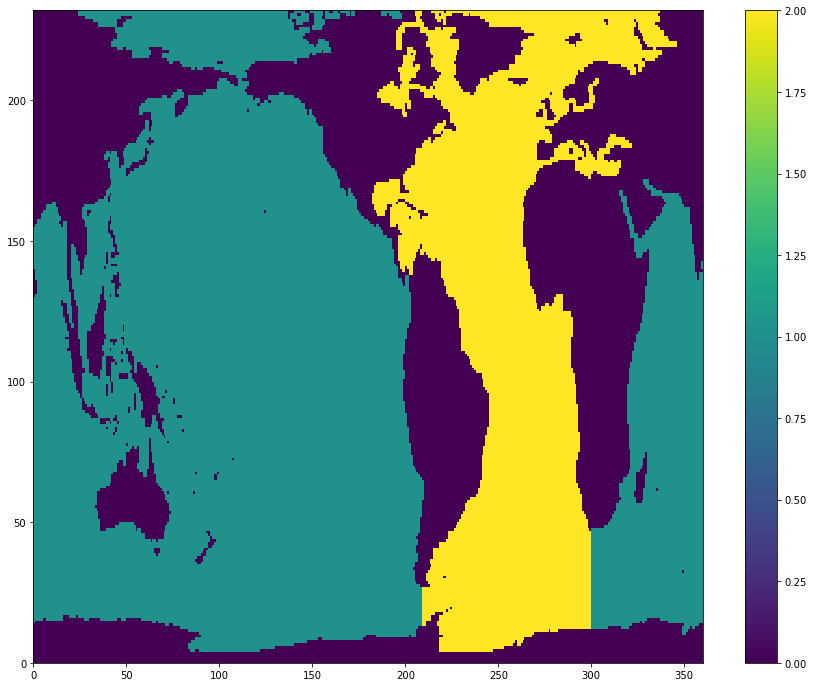

In [15]:
# Tidy:

if ((Model.name == 'ACCESS-CM2') | (Model.name == 'ACCESS-ESM1-5') | (Model.name == 'ACCESS-OM2') | 
    (Model.name == 'ACCESS1-0')  | (Model.name == 'ACCESS1-3')):
    atl_mask[260:,200:300] = tmask[260:,200:300]
elif ((Model.name == 'BCC-CSM2-MR') | (Model.name == 'BCC-ESM1')):
    atl_mask[225:,265:300] = tmask[225:,265:300]
elif ((Model.name == 'CAMS-CSM1-0')):
    atl_mask[150:,175:300] = tmask[150:,175:300]
elif ((Model.name == 'CESM1-CAM5-SE-LR') | (Model.name == 'CESM2')          | (Model.name == 'CESM2-FV2')  |
      (Model.name == 'CESM2-WACCM')      | (Model.name == 'CESM2-WACCM-FV2')| (Model.name == 'CIESM')      |
      (Model.name == 'FIO-ESM-2-0')      | (Model.name == 'SAM0-UNICON')    | (Model.name == 'TaiESM1')    |
      (Model.name == 'CCSM4')            | (Model.name == 'CESM1-BGC')      | (Model.name == 'CESM1-CAM5') | 
      (Model.name == 'CESM1-CAM5-1-FV2') | (Model.name == 'CESM1-FASTCHEM') | (Model.name == 'CESM1-WACCM')):
    # Include Baltic Sea
    atl_mask[312:,:100] = tmask[312:,:100]
elif ((Model.name == 'CMCC-CM2-HR4')    | (Model.name == 'CMCC-CM2-VHR4') | (Model.name == 'CNRM-CM6-1-HR') | 
      (Model.name == 'EC-Earth3P-HR')   | (Model.name == 'ECMWF-IFS-HR')  | (Model.name == 'ECMWF-IFS-MR')  | 
      (Model.name == 'HadGEM3-GC31-HM') | (Model.name == 'HadGEM3-GC31-MM')):
    atl_mask[1000:,750:1300] = tmask[1000:,750:1300]
elif ((Model.name == 'FGOALS-f3-L') | (Model.name == 'FGOALS-g3')):
    atl_mask[200:,:150] = tmask[200:,:150]
elif ((Model.name == 'GFDL-ESM2M') | (Model.name == 'IITM-ESM')):
    atl_mask[160:,175:] = tmask[160:,175:]
    atl_mask[130:160,250:308] = tmask[130:160,250:308]
    atl_mask[140:150,250:325] = tmask[140:150,250:325]
elif ((Model.name == 'GISS-E2-1-G') | (Model.name == 'GISS-E2-1-G-CC')):
    atl_mask[125:135,-4:] = tmask[125:135,-4:]
    atl_mask[120:140,:22] = tmask[120:140,:22]
    atl_mask[120:130,:30] = tmask[120:130,:30]
elif ((Model.name == 'HadGEM3-GC31-HH') | (Model.name == 'HadGEM3-GC31-MH')):
    atl_mask[3250:,3250:] = tmask[3250:,3250:]
elif ((Model.name == 'INM-CM4-8') | (Model.name == 'INM-CM5-0') | (Model.name == 'INM-CM5-H')):
    atl_mask[140:,:75] = tmask[140:,:75]
    atl_mask[125:135,-4:] = tmask[125:135,-4:]
    atl_mask[120:140,:22] = tmask[120:140,:22]
    atl_mask[120:131,:36] = tmask[120:131,:36]
    atl_mask[140:,280:] = tmask[140:,280:]
elif ((Model.name == 'MCM-UA-1-0')):
    atl_mask[54:60,:16] = tmask[54:60,:16]
    atl_mask[54:56,:20] = tmask[54:56,:20]
elif ((Model.name == 'MIROC-ES2L') | (Model.name == 'MIROC6')):
    atl_mask[200:,190:] = tmask[200:,190:]
elif ((Model.name == 'BNU-ESM')):
    atl_mask[135:,260:] = tmask[135:,260:]
    atl_mask[135:,:27] = tmask[135:,:27]
    atl_mask[135:147,:37] = tmask[135:147,:37]
elif ((Model.name == 'CanCM4') | (Model.name == 'CanESM2')):
    atl_mask[125:150,:30] = tmask[125:150,:30]
    atl_mask[120:172,188:] = tmask[120:172,188:]
elif ((Model.name == 'FGOALS-g2')):
    atl_mask[130:150,:40] = tmask[130:150,:40]
elif ((Model.name == 'FIO-ESM')):
    atl_mask[320:,:80] = tmask[320:,:80]
elif ((Model.name == 'GFDL-CM2p1') | (Model.name == 'GFDL-CM3')):
    atl_mask[140:,170:306] = tmask[140:,170:306]
    atl_mask[140:150,280:320] = tmask[140:150,280:320]
elif ((Model.name == 'GISS-E2-H-CC')):
    atl_mask[119:,:45] = tmask[119:,:45]
    atl_mask[119:,340:] = tmask[119:,340:]
elif ((Model.name == 'GISS-E2-R') | (Model.name == 'GISS-E2-R-CC')):
    atl_mask[119:,:21] = tmask[119:,:21]
    atl_mask[119:128,:30] = tmask[119:128,:30]
    atl_mask[119:,270:] = tmask[119:,270:]
elif ((Model.name == 'HadCM3')):
    atl_mask[90:,:20] = tmask[90:,:20]
    atl_mask[90:103,:29] = tmask[90:103,:29]
    atl_mask[90:,260:] = tmask[90:,260:]
    atl_mask[112:125,210:] = tmask[112:125,210:]
    atl_mask[112:130,220:] = tmask[112:130,220:]
elif ((Model.name == 'HadGEM2-AO') | (Model.name == 'HadGEM2-CC') | (Model.name == 'HadGEM2-ES')):
    atl_mask[150:,:28] = tmask[150:,:28]
    atl_mask[150:165,:37] = tmask[150:165,:37]
elif ((Model.name == 'MIROC-ESM') | (Model.name == 'MIROC-ESM-CHEM')):
    atl_mask[119:,:21] = tmask[119:,:21]
    atl_mask[133:145,:28] = tmask[133:145,:28]
    atl_mask[:,250:] = tmask[:,250:]
    atl_mask[150:178,189:] = tmask[150:178,189:]
elif ((Model.name == 'MIROC5')):
    atl_mask[140:170,150:180] = tmask[140:170,150:180]
    atl_mask[140:152,150:200] = tmask[140:152,150:200]
elif ((Model.name == 'MRI-CGCM3') | (Model.name == 'MRI-ESM1')):
    atl_mask[175:,180:] = tmask[175:,180:]
elif ((Model.name == 'bcc-csm1-1')):
    atl_mask[190:,180:] = tmask[190:,180:]
    atl_mask[170:,190:307] = tmask[170:,190:307]
    atl_mask[170:180,190:320] = tmask[170:180,190:320]
    
plt.figure(figsize=(15,12))
plt.pcolormesh(tmask+atl_mask)
plt.colorbar()

In [16]:
# Save to File:

ncid = Dataset(infile,'r')
dims = ncid.variables['tmask'].get_dims()
ncid.close

ncid = Dataset(outfile, 'w', format='NETCDF4')
# dimensions:
ncid.createDimension(dims[3].name,dims[3].size)
ncid.createDimension(dims[2].name,dims[2].size)
ncid.createDimension(dims[1].name,1)
ncid.createDimension(dims[0].name,None)
# variables:
ncid.createVariable('atl_mask','f8',(dims[0].name,dims[1].name,dims[2].name,dims[3].name,))
# fill variables:
ncid.variables['atl_mask'][0,0,:,:] = atl_mask
# close:
ncid.close()

In [ ]:
Models